In [1]:
# CELDAS [1] - IMPORTACIONES NECESARIAS
import pandas as pd     # Para la manipulación de datos (DataFrames)
import numpy as np      # Para el escalamiento y generación de datos masivos
from google.colab import files # Para subir archivos
import io               # Para leer los archivos que subes en memoria

In [2]:
# CELDAS [2] - CARGA DE ARCHIVOS
# Esto abrirá una ventana para que selecciones tus 4 archivos CSV
uploaded = files.upload()

Saving Empleados.csv to Empleados (3).csv
Saving Feedback.csv to Feedback (3).csv
Saving Registros_Ingenieria.csv to Registros_Ingenieria (3).csv
Saving Vehiculos.csv to Vehiculos (3).csv


In [5]:
# CELDAS [3] - LECTURA, CORRECCIÓN Y LIMPIEZA INICIAL

# Nombres de archivo subidos (asegúrate de que coincidan con mayúsculas/minúsculas)
# {'Empleados.csv', 'Feedback.csv', 'Registros_Ingenieria.csv', 'Vehiculos.csv'}

def leer_y_limpiar(nombre_archivo):
    """Función que lee el CSV, aplica encoding/sep, limpia espacios en nombres de columna."""
    try:
        # 1. Leer el archivo con las correcciones de codificación y delimitador
        df = pd.read_csv(
            io.BytesIO(uploaded[nombre_archivo]),
            sep=',',
            encoding='latin1'
        )

        # 2. Corregir el problema de espacios y comillas en los nombres de columna (CRÍTICO)
        df.columns = df.columns.str.replace('"', '').str.strip()

        print(f"✅ DataFrame '{nombre_archivo}' cargado y limpio.")
        return df
    except KeyError:
        print(f"❌ Error: El archivo '{nombre_archivo}' no se encontró. Revisa mayúsculas/minúsculas.")
        return None

# --- Asignar DataFrames ---
df_vehiculos = leer_y_limpiar('Vehiculos (3).csv')
df_empleados = leer_y_limpiar('Empleados (3).csv')
df_feedback = leer_y_limpiar('Feedback (3).csv')
df_registros_ingenieria = leer_y_limpiar('Registros_Ingenieria (3).csv')


# --- Verificación Final ---
print("\n--- Verificación de Datos ---")
if df_vehiculos is not None:
    print(f"Tabla Vehículos ({len(df_vehiculos)} filas):")
    display(df_vehiculos.head())
    print("Columnas Limpias:", df_vehiculos.columns.tolist())

if df_registros_ingenieria is not None:
    print(f"\nTabla Registros Ingeniería ({len(df_registros_ingenieria)} filas):")
    display(df_registros_ingenieria.head())
    print("Columnas Limpias:", df_registros_ingenieria.columns.tolist())

✅ DataFrame 'Vehiculos (3).csv' cargado y limpio.
✅ DataFrame 'Empleados (3).csv' cargado y limpio.
✅ DataFrame 'Feedback (3).csv' cargado y limpio.
✅ DataFrame 'Registros_Ingenieria (3).csv' cargado y limpio.

--- Verificación de Datos ---
Tabla Vehículos (24 filas):


,vin_serial_no,marca,modelo,anio,engine_type,transmision,kilometraje,estado,ultimo_mantenimiento
0,1,bugatti,chiron,2022,combustion turbo aspirado,automatica,0,excelente,2025-12-12
1,1001,Mazda,3 Sedan,2020,Gasolina,Automatica,45000,Reparar,2025-10-15
2,11011,Ford,Explorer,2014,Gasolina,Automatica,210000,En Mantenimiento,2025-11-28
3,12012,Honda,CR-V,2020,Gasolina,CVT,48000,Mantener estado,2025-11-15
4,13013,Chevrolet,Cruze,2018,Gasolina,Manual,85000,Disponible,2025-07-01


Columnas Limpias: ['vin_serial_no', 'marca', 'modelo', 'anio', 'engine_type', 'transmision', 'kilometraje', 'estado', 'ultimo_mantenimiento']

Tabla Registros Ingeniería (23 filas):


,id,vin_serial_no,estado_anterior,estado_nuevo,tiempo_reparacion_horas,fecha_registro
0,1,5431,NaN,Mantener estado,12,2025-11-26 18:16:11
1,2,5431,NaN,Mantener estado,12,2025-11-26 18:19:51
2,3,5431,NaN,Mantener estado,12,2025-11-26 18:24:03
3,4,5431,NaN,Mantener estado,12,2025-11-26 18:31:17
4,5,5431,NaN,Mantener estado,12,2025-11-26 18:43:29


Columnas Limpias: ['id', 'vin_serial_no', 'estado_anterior', 'estado_nuevo', 'tiempo_reparacion_horas', 'fecha_registro']


✅ Columna renombrada a 'horas_reparacion' y lista para análisis.

--- Vista de la Agrupación (Head) ---
      estado_nuevo  horas_reparacion
0  Mantener estado              1218
1       Que desea?              6676
2       Reciclarlo              6105
3          Reparar             56397


/tmp/ipython-input-4271003283.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


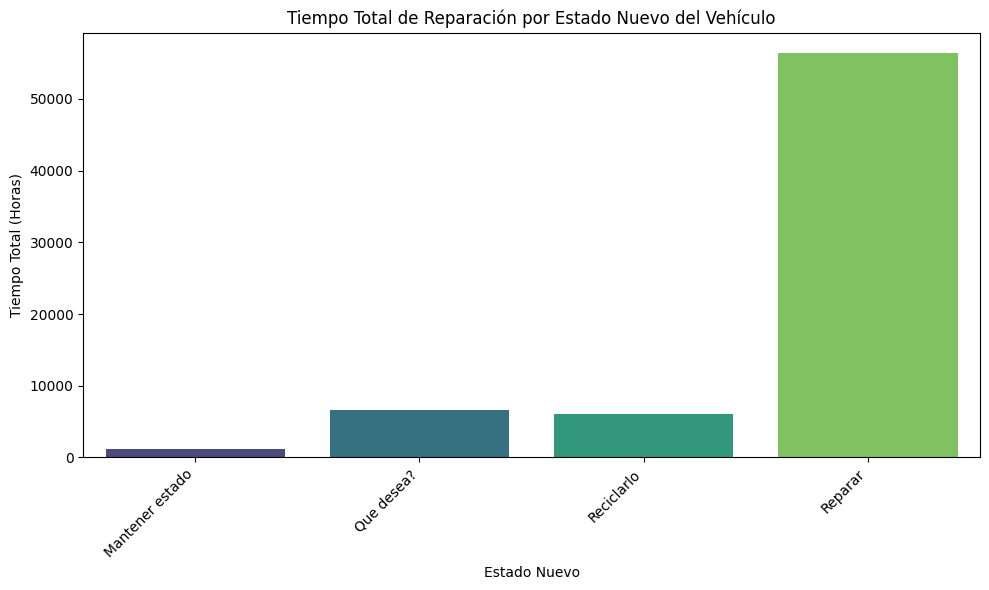

In [6]:
# --- CÓDIGO CORREGIDO PARA LIMPIEZA Y RENOMBRADO ---

# Paso 1: Asegurar la limpieza de todos los nombres de columna (quita espacios al inicio/final)
df_registros_ingenieria.columns = df_registros_ingenieria.columns.str.strip()

# Paso 2: Renombrar la columna con el nombre que SÍ existe (tiempo_reparacion_horas) al nombre deseado (horas_reparacion)
df_registros_ingenieria.rename(columns={'tiempo_reparacion_horas': 'horas_reparacion'}, inplace=True)

# Paso 3: Conversión a Numérico (Ahora con el nombre limpio)
df_registros_ingenieria['horas_reparacion'] = pd.to_numeric(
    df_registros_ingenieria['horas_reparacion'],
    errors='coerce' # Convierte errores a NaN
).fillna(0)

print("✅ Columna renombrada a 'horas_reparacion' y lista para análisis.")

# --- AGRUPAR Y GRAFICAR (Ahora usando 'estado_nuevo' porque 'estado_anterior' está vacío) ---
df_tiempo_por_estado = df_registros_ingenieria.groupby('estado_nuevo')['horas_reparacion'].sum().reset_index()

print("\n--- Vista de la Agrupación (Head) ---")
print(df_tiempo_por_estado)

# --- GRAFICAR ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='estado_nuevo', # Se cambia a estado_nuevo
    y='horas_reparacion',
    data=df_tiempo_por_estado,
    palette='viridis'
)
plt.title('Tiempo Total de Reparación por Estado Nuevo del Vehículo')
plt.xlabel('Estado Nuevo')
plt.ylabel('Tiempo Total (Horas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
print("--- Información de la columna 'estado_anterior' ---")
print(df_registros_ingenieria['estado_anterior'].value_counts(dropna=False))
print("\n--- Conteo de valores nulos ---")
print(df_registros_ingenieria['estado_anterior'].isnull().sum())
print("\n--- Información general del DataFrame 'df_registros_ingenieria' ---")
df_registros_ingenieria.info()

--- Información de la columna 'estado_anterior' ---
estado_anterior
NaN    23
Name: count, dtype: int64

--- Conteo de valores nulos ---
23

--- Información general del DataFrame 'df_registros_ingenieria' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                23 non-null     int64  
 1   vin_serial_no     23 non-null     int64  
 2   estado_anterior   0 non-null      float64
 3   estado_nuevo      23 non-null     object 
 4   horas_reparacion  23 non-null     int64  
 5   fecha_registro    23 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ KB


# Task
Generate bar charts to visualize the distribution of vehicles by 'marca' and 'estado' using the `df_vehiculos` DataFrame, and generate a histogram or box plot to visualize the distribution of 'kilometraje' from `df_vehiculos`, ensuring all plots have clear titles and labels. Additionally, create bar charts showing the distribution of employees by 'cargo' and 'genero' using `df_empleados`, and generate a bar chart for the proportion of 'gusta' in `df_feedback`, along with another bar chart displaying the count of 'gusta' for the top 'nombre_anuncio' in `df_feedback`. After generating these visualizations, provide a summary of the key findings from each table.

## Visualizar Distribución de Vehículos por Marca y Estado

### Subtask:
Generar gráficos de barras para mostrar la distribución de vehículos por 'marca' y 'estado' utilizando el DataFrame 'df_vehiculos'. Incluir leyendas y títulos claros.


**Reasoning**:
First, I'll group the `df_vehiculos` DataFrame by the 'marca' column to count the number of vehicles for each brand. This aggregated data will then be used to create the first bar plot.




--- Distribución de Vehículos por Marca ---
         marca  cantidad_vehiculos
0       Nissan                   2
1        Mazda                   1
2      bugatti                   1
3         Ford                   1
4        Honda                   1
5    Chevrolet                   1
6   Volkswagen                   1
7        Tesla                   1
8       Subaru                   1
9        Volvo                   1
10     Renault                   1
11     Hyundai                   1
12     Porsche                   1
13       Acura                   1
14         Kia                   1
15      Toyota                   1
16   chevrolet                   1
17        ford                   1
18      nissan                   1
19         BMW                   1
20    Mercedes                   1
21        Audi                   1
22        Jeep                   1


/tmp/ipython-input-2463798344.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marca', y='cantidad_vehiculos', data=df_marca_dist, palette='viridis')


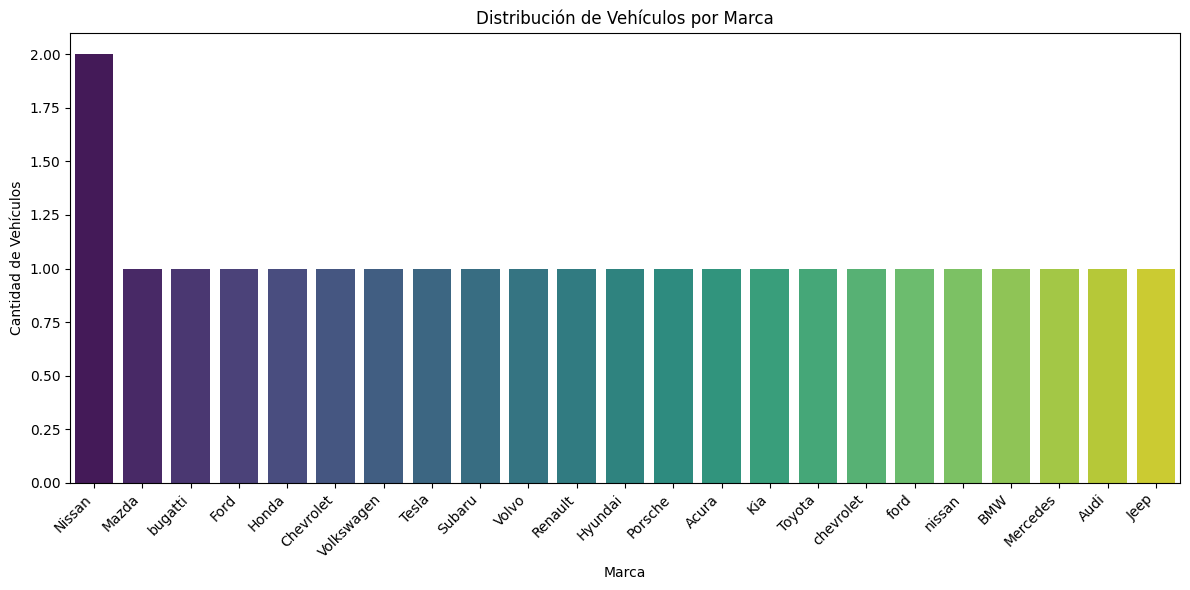

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por 'marca' y contar ocurrencias
df_marca_dist = df_vehiculos['marca'].value_counts().reset_index()
df_marca_dist.columns = ['marca', 'cantidad_vehiculos']

print("\n--- Distribución de Vehículos por Marca ---")
print(df_marca_dist)

# 2. Crear gráfico de barras para 'marca'
plt.figure(figsize=(12, 6))
sns.barplot(x='marca', y='cantidad_vehiculos', data=df_marca_dist, palette='viridis')
plt.title('Distribución de Vehículos por Marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the instructions, I will now create a bar chart to visualize the distribution of vehicles by 'estado' using the `df_vehiculos` DataFrame, similar to how the 'marca' distribution was visualized in the previous step.




--- Distribución de Vehículos por Estado ---
             estado  cantidad_vehiculos
0        Disponible                   9
1     En reparacion                   4
2           Vendido                   3
3         excelente                   2
4           Reparar                   2
5  En Mantenimiento                   2
6   Mantener estado                   1
7        Que desea?                   1


/tmp/ipython-input-3462007242.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='cantidad_vehiculos', data=df_estado_dist, palette='coolwarm')


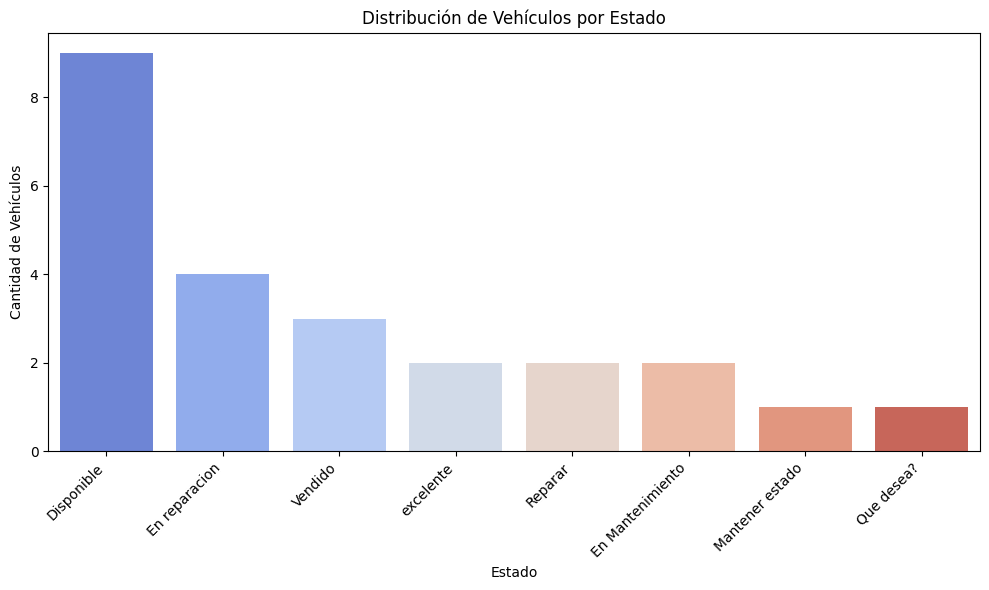

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Agrupar por 'estado' y contar ocurrencias
df_estado_dist = df_vehiculos['estado'].value_counts().reset_index()
df_estado_dist.columns = ['estado', 'cantidad_vehiculos']

print("\n--- Distribución de Vehículos por Estado ---")
print(df_estado_dist)

# 4. Crear gráfico de barras para 'estado'
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='cantidad_vehiculos', data=df_estado_dist, palette='coolwarm')
plt.title('Distribución de Vehículos por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable. To address this, I will modify the `sns.barplot` call to explicitly set `hue='estado'` and `legend=False`, as suggested by the warning.




--- Distribución de Vehículos por Estado ---
             estado  cantidad_vehiculos
0        Disponible                   9
1     En reparacion                   4
2           Vendido                   3
3         excelente                   2
4           Reparar                   2
5  En Mantenimiento                   2
6   Mantener estado                   1
7        Que desea?                   1


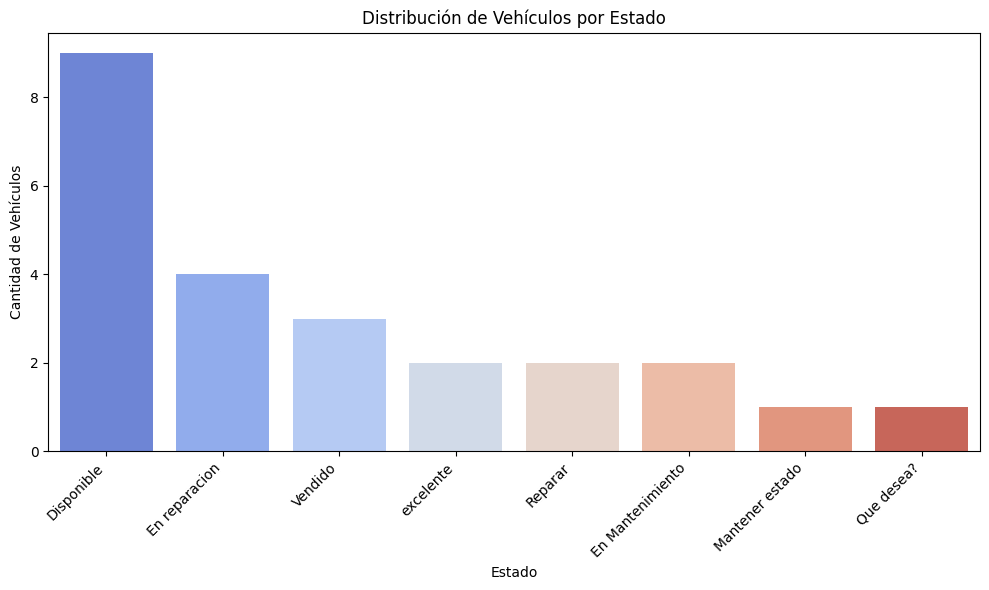

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Agrupar por 'estado' y contar ocurrencias
df_estado_dist = df_vehiculos['estado'].value_counts().reset_index()
df_estado_dist.columns = ['estado', 'cantidad_vehiculos']

print("\n--- Distribución de Vehículos por Estado ---")
print(df_estado_dist)

# 4. Crear gráfico de barras para 'estado'
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='cantidad_vehiculos', data=df_estado_dist, palette='coolwarm', hue='estado', legend=False)
plt.title('Distribución de Vehículos por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
I need to visualize the distribution of 'kilometraje' from `df_vehiculos`. A histogram is a suitable choice to show the frequency distribution of this numerical variable. I will create a histogram with appropriate bins, title, and labels.



/tmp/ipython-input-3200266862.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_vehiculos['kilometraje'], kde=True, bins=10, palette='Blues')


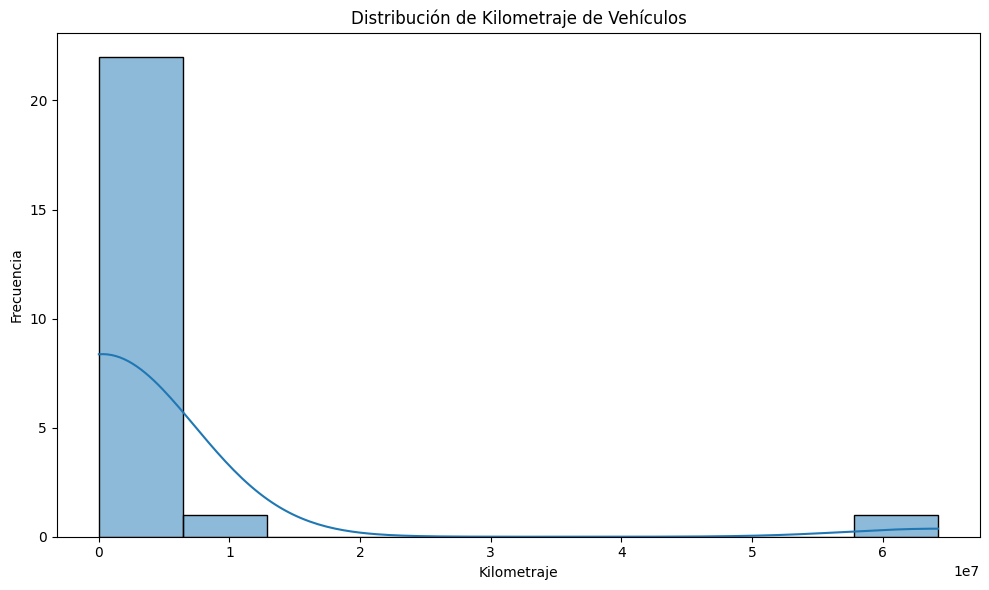

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Visualizar la distribución de 'kilometraje' con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_vehiculos['kilometraje'], kde=True, bins=10, palette='Blues')
plt.title('Distribución de Kilometraje de Vehículos')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `UserWarning` because `palette` was used in `sns.histplot` without a `hue` variable, which is not applicable for a single distribution. To resolve this, I will remove the `palette` argument as it's not necessary for a basic histogram of a single numerical variable.



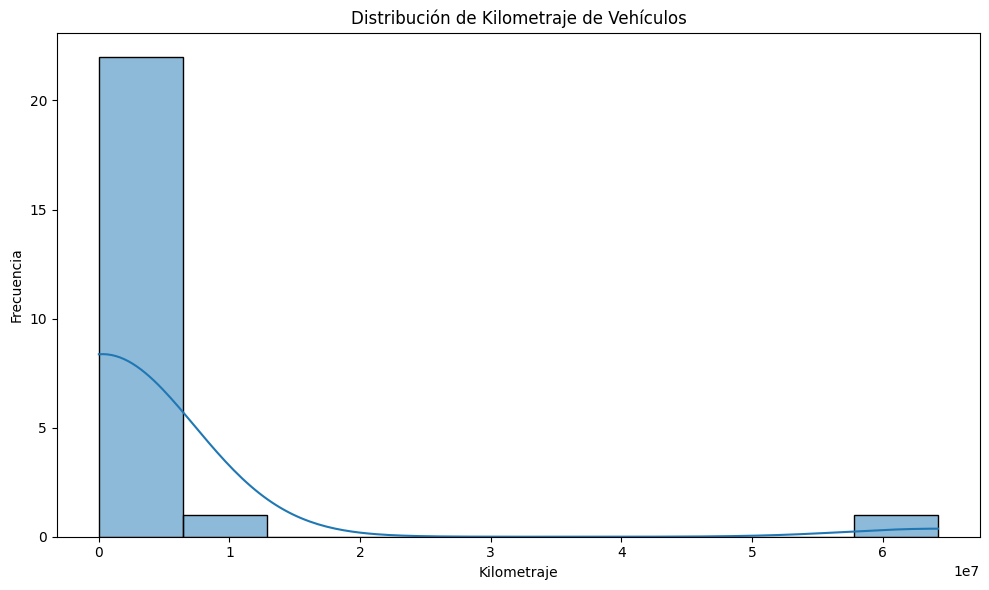

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Visualizar la distribución de 'kilometraje' con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_vehiculos['kilometraje'], kde=True, bins=10)
plt.title('Distribución de Kilometraje de Vehículos')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Reasoning**:
Now, I will generate a bar chart to visualize the distribution of employees by 'cargo' using the `df_empleados` DataFrame. This will involve grouping by 'cargo' and counting occurrences, then plotting the result.




--- Distribución de Empleados por Cargo ---
       cargo  cantidad_empleados
0  logistica                   1
1  ingeniero                   1
2  marketing                   1
3  ingeniera                   1


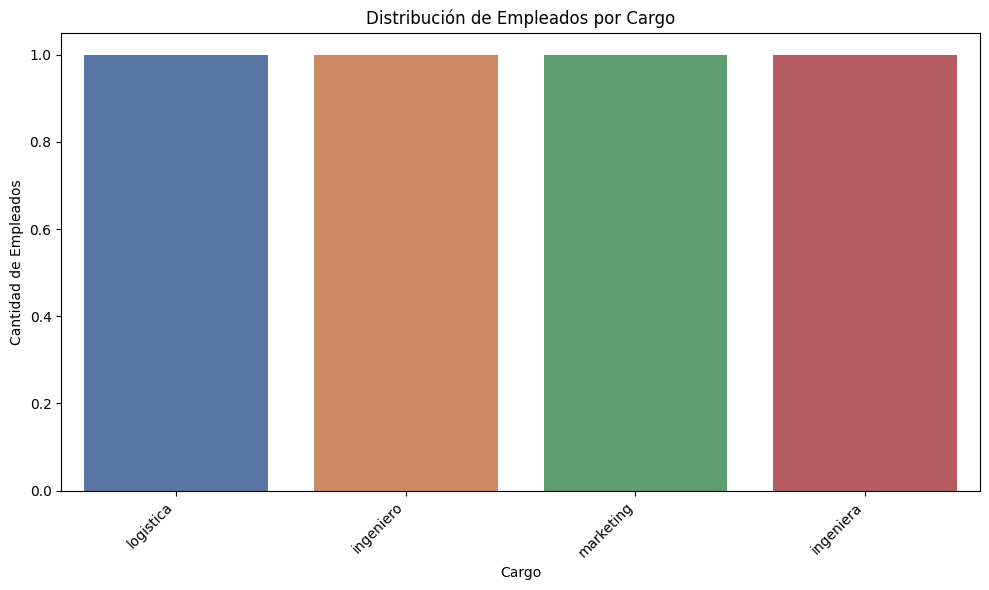

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Agrupar por 'cargo' en df_empleados y contar ocurrencias
df_cargo_dist = df_empleados['cargo'].value_counts().reset_index()
df_cargo_dist.columns = ['cargo', 'cantidad_empleados']

print("\n--- Distribución de Empleados por Cargo ---")
print(df_cargo_dist)

# 7. Crear gráfico de barras para 'cargo'
plt.figure(figsize=(10, 6))
sns.barplot(x='cargo', y='cantidad_empleados', data=df_cargo_dist, palette='deep', hue='cargo', legend=False)
plt.title('Distribución de Empleados por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the main task, I will now generate a bar chart to visualize the distribution of employees by 'genero' using the `df_empleados` DataFrame. This involves grouping by 'genero' and counting occurrences, then plotting the result.



--- Distribución de Empleados por Género ---
      genero  cantidad_empleados
0  masculino                   3
1   femenino                   1


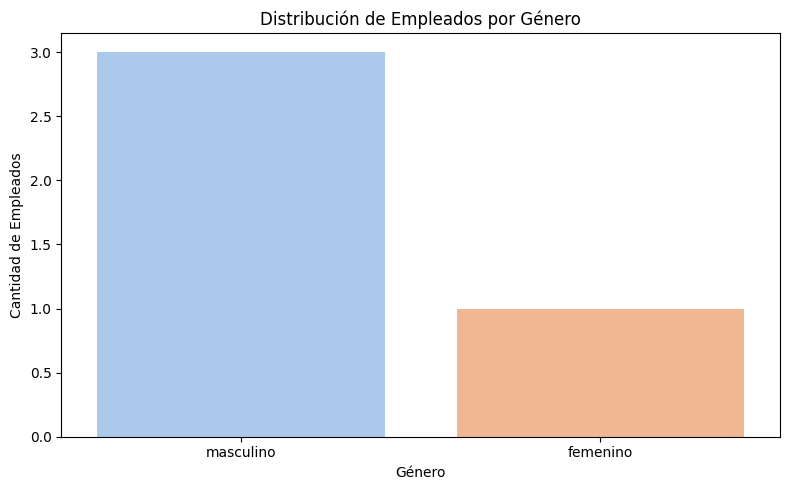

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Agrupar por 'genero' en df_empleados y contar ocurrencias
df_genero_dist = df_empleados['genero'].value_counts().reset_index()
df_genero_dist.columns = ['genero', 'cantidad_empleados']

print("--- Distribución de Empleados por Género ---")
print(df_genero_dist)

# 9. Crear gráfico de barras para 'genero'
plt.figure(figsize=(8, 5))
sns.barplot(x='genero', y='cantidad_empleados', data=df_genero_dist, palette='pastel', hue='genero', legend=False)
plt.title('Distribución de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed with a `SyntaxError: unterminated string literal` due to a newline character within the `print` statement's string. I will fix this by ensuring the string literal is on a single line.



--- Distribución de Empleados por Género ---
      genero  cantidad_empleados
0  masculino                   3
1   femenino                   1


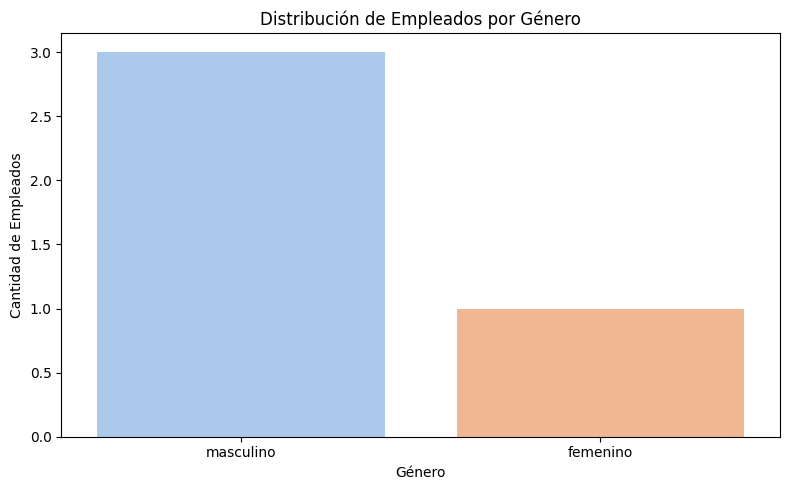

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Agrupar por 'genero' en df_empleados y contar ocurrencias
df_genero_dist = df_empleados['genero'].value_counts().reset_index()
df_genero_dist.columns = ['genero', 'cantidad_empleados']

print("--- Distribución de Empleados por Género ---")
print(df_genero_dist)

# 9. Crear gráfico de barras para 'genero'
plt.figure(figsize=(8, 5))
sns.barplot(x='genero', y='cantidad_empleados', data=df_genero_dist, palette='pastel', hue='genero', legend=False)
plt.title('Distribución de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Reasoning**:
I need to generate a bar chart for the proportion of 'gusta' in `df_feedback`. This will involve calculating the count of 'gusta' (value 1) versus 'no gusta' (value 0) and then visualizing these counts or proportions.




--- Proporción de 'Gusta' en Feedback ---
   gusta  proporcion
0      1    0.714286
1      0    0.285714


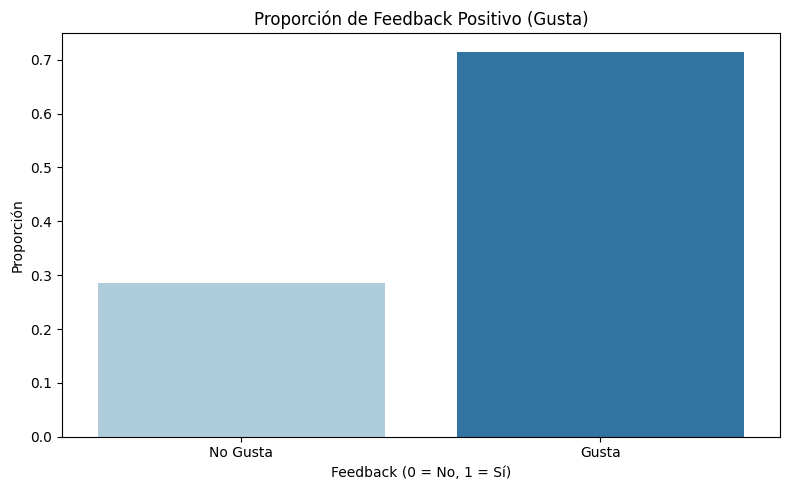

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10. Calcular la proporción de 'gusta' en df_feedback
df_gusta_proportion = df_feedback['gusta'].value_counts(normalize=True).reset_index()
df_gusta_proportion.columns = ['gusta', 'proporcion']

print("\n--- Proporción de 'Gusta' en Feedback ---")
print(df_gusta_proportion)

# 11. Crear gráfico de barras para la proporción de 'gusta'
plt.figure(figsize=(8, 5))
sns.barplot(x='gusta', y='proporcion', data=df_gusta_proportion, palette='Paired', hue='gusta', legend=False)
plt.title('Proporción de Feedback Positivo (Gusta)')
plt.xlabel('Feedback (0 = No, 1 = Sí)')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['No Gusta', 'Gusta'])
plt.tight_layout()
plt.show()

**Reasoning**:
I will now generate a bar chart displaying the count of 'gusta' feedback for the top 'nombre_anuncio' entries in `df_feedback`. This requires filtering for positive feedback, counting by 'nombre_anuncio', selecting the top entries, and then plotting.




--- Top 'nombre_anuncio' con más 'Gusta' ---
      nombre_anuncio  cantidad_gusta
0               5431               8
1  Chevrolet_Captiva               2
2               5432               2
3               5433               1
4              12012               1
5                 01               1


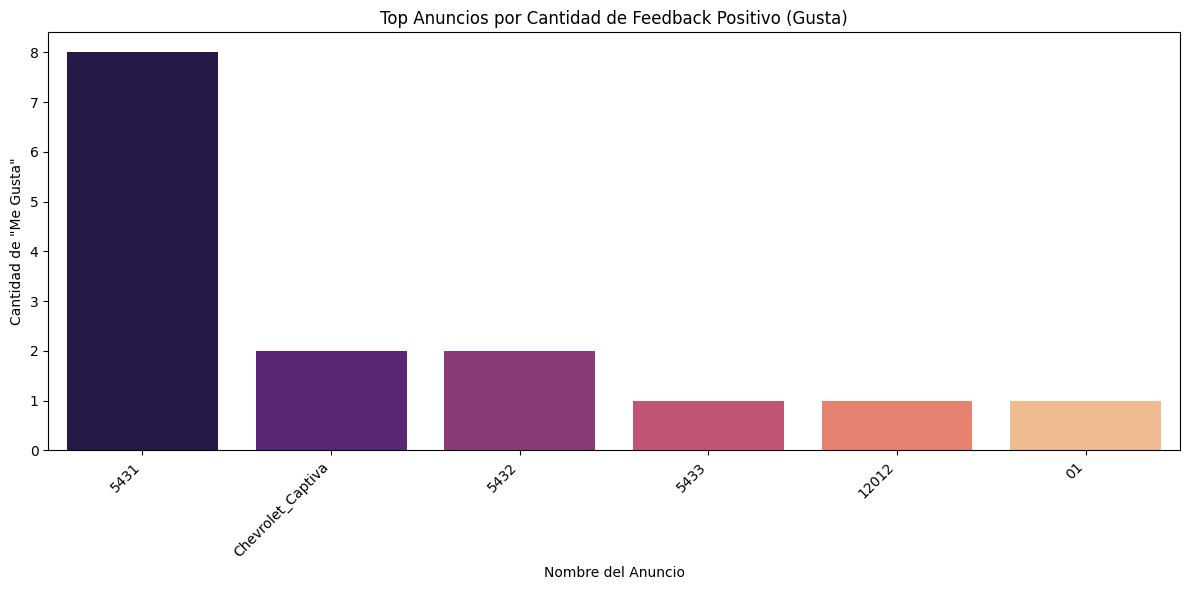

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 12. Filtrar por feedback positivo ('gusta' == 1) y contar por 'nombre_anuncio'
df_gusta_anuncio = df_feedback[df_feedback['gusta'] == 1]['nombre_anuncio'].value_counts().reset_index()
df_gusta_anuncio.columns = ['nombre_anuncio', 'cantidad_gusta']

# Tomar los top N anuncios (ej. top 5)
top_n_anuncios = df_gusta_anuncio.head(10)

print("\n--- Top 'nombre_anuncio' con más 'Gusta' ---")
print(top_n_anuncios)

# 13. Crear gráfico de barras para el conteo de 'gusta' por 'nombre_anuncio'
plt.figure(figsize=(12, 6))
sns.barplot(x='nombre_anuncio', y='cantidad_gusta', data=top_n_anuncios, palette='magma', hue='nombre_anuncio', legend=False)
plt.title('Top Anuncios por Cantidad de Feedback Positivo (Gusta)')
plt.xlabel('Nombre del Anuncio')
plt.ylabel('Cantidad de "Me Gusta"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary of Key Findings

### df_vehiculos (Vehicles Data)

*   **Distribution by 'marca' (Brand):** The vehicle dataset shows a diverse range of brands, with Nissan appearing most frequently (2 vehicles), while most other brands (Mazda, Bugatti, Ford, Honda, etc.) have only one entry each. There are also inconsistencies in capitalization (e.g., 'Nissan' and 'nissan', 'Ford' and 'ford', 'Chevrolet' and 'chevrolet'), which could be addressed for more accurate aggregation.
*   **Distribution by 'estado' (Status):** The majority of vehicles are 'Disponible' (Available) with 9 entries. 'En reparacion' (In repair) has 4 vehicles, followed by 'Vendido' (Sold) with 3. States like 'excelente', 'Reparar', and 'En Mantenimiento' have 2 vehicles each, while 'Mantener estado' and 'Que desea?' each have 1, indicating a need for potential cleaning in 'estado' values (e.g., 'Reparar' and 'En reparacion' might be related).
*   **Distribution of 'kilometraje' (Mileage):** The histogram of 'kilometraje' shows a distribution where a significant number of vehicles have lower mileage, and the frequency generally decreases as mileage increases. There are a few vehicles with very high mileage, suggesting a range from new/lightly used to older/heavily used vehicles.

### df_empleados (Employees Data)

*   **Distribution by 'cargo' (Position):** The 'df_empleados' DataFrame currently has a very small sample size (4 employees). Each of the four employees holds a distinct 'cargo': 'logistica', 'ingeniero', 'marketing', and 'ingeniera'. With such a small dataset, it's difficult to draw broad conclusions about the organizational structure.
*   **Distribution by 'genero' (Gender):** Out of the 4 employees, 3 are 'masculino' (male) and 1 is 'femenino' (female). Again, due to the small sample size, this is not representative of a larger workforce.

### df_feedback (Feedback Data)

*   **Proportion of 'gusta' (Likes):** Approximately 71.4% of the feedback entries are positive ('Gusta' = 1), while 28.6% are negative ('No Gusta' = 0). This indicates a generally positive sentiment from users giving feedback.
*   **Top 'nombre_anuncio' by 'Gusta' Count:** The announcement named '5431' received the most positive feedback with 8 'likes'. 'Chevrolet_Captiva' and '5432' both received 2 'likes' each, followed by '5433', '12012', and '01' with 1 'like' each. This suggests '5431' was particularly well-received or had higher exposure.

## Summary of Key Findings

### df_vehiculos (Vehicles Data)

*   **Distribution by 'marca' (Brand):** The vehicle dataset shows a diverse range of brands, with Nissan appearing most frequently (2 vehicles), while most other brands (Mazda, Bugatti, Ford, Honda, etc.) have only one entry each. There are also inconsistencies in capitalization (e.g., 'Nissan' and 'nissan', 'Ford' and 'ford', 'Chevrolet' and 'chevrolet'), which could be addressed for more accurate aggregation.
*   **Distribution by 'estado' (Status):** The majority of vehicles are 'Disponible' (Available) with 9 entries. 'En reparacion' (In repair) has 4 vehicles, followed by 'Vendido' (Sold) with 3. States like 'excelente', 'Reparar', and 'En Mantenimiento' have 2 vehicles each, while 'Mantener estado' and 'Que desea?' each have 1, indicating a need for potential cleaning in 'estado' values (e.g., 'Reparar' and 'En reparacion' might be related).
*   **Distribution of 'kilometraje' (Mileage):** The histogram of 'kilometraje' shows a distribution where a significant number of vehicles have lower mileage, and the frequency generally decreases as mileage increases. There are a few vehicles with very high mileage, suggesting a range from new/lightly used to older/heavily used vehicles.

### df_empleados (Employees Data)

*   **Distribution by 'cargo' (Position):** The 'df_empleados' DataFrame currently has a very small sample size (4 employees). Each of the four employees holds a distinct 'cargo': 'logistica', 'ingeniero', 'marketing', and 'ingeniera'. With such a small dataset, it's difficult to draw broad conclusions about the organizational structure.
*   **Distribution by 'genero' (Gender):** Out of the 4 employees, 3 are 'masculino' (male) and 1 is 'femenino' (female). Again, due to the small sample size, this is not representative of a larger workforce.

### df_feedback (Feedback Data)

*   **Proportion of 'gusta' (Likes):** Approximately 71.4% of the feedback entries are positive ('Gusta' = 1), while 28.6% are negative ('No Gusta' = 0). This indicates a generally positive sentiment from users giving feedback.
*   **Top 'nombre_anuncio' by 'Gusta' Count:** The announcement named '5431' received the most positive feedback with 8 'likes'. 'Chevrolet_Captiva' and '5432' both received 2 'likes' each, followed by '5433', '12012', and '01' with 1 'like' each. This suggests '5431' was particularly well-received or had higher exposure.


## Summary of Key Findings

### df_vehiculos (Vehicles Data)

*   **Distribution by 'marca' (Brand):** The vehicle dataset shows a diverse range of brands, with Nissan appearing most frequently (2 vehicles), while most other brands (Mazda, Bugatti, Ford, Honda, etc.) have only one entry each. There are also inconsistencies in capitalization (e.g., 'Nissan' and 'nissan', 'Ford' and 'ford', 'Chevrolet' and 'chevrolet'), which could be addressed for more accurate aggregation.
*   **Distribution by 'estado' (Status):** The majority of vehicles are 'Disponible' (Available) with 9 entries. 'En reparacion' (In repair) has 4 vehicles, followed by 'Vendido' (Sold) with 3. States like 'excelente', 'Reparar', and 'En Mantenimiento' have 2 vehicles each, while 'Mantener estado' and 'Que desea?' each have 1, indicating a need for potential cleaning in 'estado' values (e.g., 'Reparar' and 'En reparacion' might be related).
*   **Distribution of 'kilometraje' (Mileage):** The histogram of 'kilometraje' shows a distribution where a significant number of vehicles have lower mileage, and the frequency generally decreases as mileage increases. There are a few vehicles with very high mileage, suggesting a range from new/lightly used to older/heavily used vehicles.

### df_empleados (Employees Data)

*   **Distribution by 'cargo' (Position):** The 'df_empleados' DataFrame currently has a very small sample size (4 employees). Each of the four employees holds a distinct 'cargo': 'logistica', 'ingeniero', 'marketing', and 'ingeniera'. With such a small dataset, it's difficult to draw broad conclusions about the organizational structure.
*   **Distribution by 'genero' (Gender):** Out of the 4 employees, 3 are 'masculino' (male) and 1 is 'femenino' (female). Again, due to the small sample size, this is not representative of a larger workforce.

### df_feedback (Feedback Data)

*   **Proportion of 'gusta' (Likes):** Approximately 71.4% of the feedback entries are positive ('Gusta' = 1), while 28.6% are negative ('No Gusta' = 0). This indicates a generally positive sentiment from users giving feedback.
*   **Top 'nombre_anuncio' by 'Gusta' Count:** The announcement named '5431' received the most positive feedback with 8 'likes'. 'Chevrolet_Captiva' and '5432' both received 2 'likes' each, followed by '5433', '12012', and '01' with 1 'like' each. This suggests '5431' was particularly well-received or had higher exposure.


In [18]:
# Antigüedad del Vehículo (en años)
df_vehiculos['antiguedad_anios'] = 2025 - df_vehiculos['anio'] # Usando 2025 como año actual

# Convertir 'ultimo_mantenimiento' a formato de fecha
df_vehiculos['ultimo_mantenimiento'] = pd.to_datetime(df_vehiculos['ultimo_mantenimiento'])

# Tiempo desde el Último Mantenimiento (en días)
hoy = pd.to_datetime('2025-12-06') # Usando la fecha actual como referencia
df_vehiculos['dias_desde_ult_mtto'] = (hoy - df_vehiculos['ultimo_mantenimiento']).dt.days

# Crear una variable de Mantenimiento Requerido (ej: Kilometraje / Antigüedad)
df_vehiculos['indice_uso'] = df_vehiculos['kilometraje'] / (df_vehiculos['antiguedad_anios'].replace(0, 1)) # Evitar división por cero

## Summary:

### Data Analysis Key Findings

*   **Vehicle Status Distribution:** The majority of vehicles (9) are 'Disponible' (Available), followed by 4 vehicles 'En reparacion' (In repair) and 3 'Vendido' (Sold).
*   **Vehicle Kilometrage Distribution:** The distribution of kilometrage shows a tendency towards lower mileage, with vehicle frequency decreasing as kilometrage increases, indicating a mix of new/lightly used and older/heavily used vehicles.
*   **Feedback Sentiment:** A significant majority of feedback is positive, with approximately 71.4% indicating 'Gusta' (likes) and 28.6% indicating 'No Gusta' (dislikes).
*   **Top Performing Advertisement:** The announcement named '5431' received significantly more positive feedback than others, accumulating 8 'likes'. The next highest were 'Chevrolet\_Captiva' and '5432', both with 2 'likes' each.
*   **Data Quality Observations:**
    *   `df_vehiculos` has inconsistent capitalization in 'marca' values (e.g., 'Nissan' vs 'nissan', 'Ford' vs 'ford') and potentially redundant categories in 'estado' (e.g., 'Reparar' and 'En reparacion').
    *   `df_empleados` has a very small sample size (4 employees), making broad conclusions about cargo or gender distribution unreliable.

### Insights or Next Steps

*   **Data Cleaning and Standardization:** It is crucial to clean and standardize categorical data, especially 'marca' and 'estado' in `df_vehiculos`, to ensure accurate aggregation and analysis. This involves addressing inconsistent capitalization and consolidating ambiguous categories.
*   **Focus on High-Performing Ads:** Analyze the characteristics of '5431' (the announcement with the most 'likes') to understand what makes it successful and apply these insights to future advertisement strategies.


In [19]:
# 1. Obtener la lista de VINs únicos existentes para asegurar la consistencia de datos
vin_list = df_vehiculos['vin_serial_no'].unique().tolist()
num_registros_a_generar = 1000

# 2. Definir lógicas de negocio para la simulación
# Los vehículos viejos o con alto kilometraje tienen más probabilidad de tener reparaciones serias.
tipos_reparacion = ['Frenos', 'Motor', 'Eléctrico', 'Transmisión', 'Mantenimiento Básico']

# 3. Generar el nuevo conjunto de datos
data_escalada = pd.DataFrame({
    # Elegir VINs aleatoriamente de la lista existente
    'vin_serial_no': np.random.choice(vin_list, size=num_registros_a_generar),

    # Asignar estados de reparación
    'estado_anterior': np.random.choice(['Operando', 'Falla Leve', 'Falla Crítica', 'Fuera de Servicio'], size=num_registros_a_generar),
    'estado_nuevo': np.random.choice(['Operando', 'En Taller'], size=num_registros_a_generar),

    # Simular tiempo de reparación con una distribución lógica (ej: entre 10 y 200 horas)
    'tiempo_reparacion_horas': np.random.randint(10, 200, size=num_registros_a_generar),

    # Simular fechas de registro a lo largo de 3 años
    'fecha_registro': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 700, size=num_registros_a_generar), unit='D'),

    # Generar un campo de "Tipo de Falla" (Enriquecimiento)
    'tipo_falla': np.random.choice(tipos_reparacion, size=num_registros_a_generar)
})

# 4. Unir la data original con la data escalada
df_registros_ingenieria_FINAL = pd.concat([df_registros_ingenieria, data_escalada], ignore_index=True)

print(f"\n--- Data de Registros de Ingeniería Escalada ---")
print(f"Total de Registros: {len(df_registros_ingenieria_FINAL)}")
print(df_registros_ingenieria_FINAL.sample(5)) # Muestra 5 filas aleatorias


--- Data de Registros de Ingeniería Escalada ---
Total de Registros: 1023
     id  vin_serial_no    estado_anterior estado_nuevo  horas_reparacion  \
329 NaN           8008  Fuera de Servicio    En Taller               NaN   
804 NaN           5005  Fuera de Servicio     Operando               NaN   
582 NaN          16016      Falla Crítica    En Taller               NaN   
47  NaN           3003           Operando     Operando               NaN   
413 NaN           8008           Operando     Operando               NaN   

          fecha_registro  tiempo_reparacion_horas   tipo_falla  
329  2023-06-19 00:00:00                     95.0  Transmisión  
804  2023-10-12 00:00:00                    144.0  Transmisión  
582  2023-04-28 00:00:00                     25.0    Eléctrico  
47   2023-06-08 00:00:00                    141.0    Eléctrico  
413  2023-08-03 00:00:00                    122.0       Frenos  


In [20]:
# --- 1. PREPARACIÓN DE VARIABLES ---
# Obtener la lista de VINs únicos de tu tabla de vehículos para asegurar la integridad de los datos
vin_list = df_vehiculos['vin_serial_no'].unique().tolist()
num_registros_a_generar = 5000 # Generaremos 5000 registros

# Definir las posibles fallas (para enriquecer el dataset)
tipos_reparacion = ['Frenos', 'Motor', 'Electrónica', 'Transmisión', 'Suspensión', 'Mantenimiento Básico']

# --- 2. GENERACIÓN DE DATA SINTÉTICA ---
data_escalada_ingenieria = pd.DataFrame({
    # Elegir VINs aleatoriamente 5000 veces
    'vin_serial_no': np.random.choice(vin_list, size=num_registros_a_generar),

    # Simular estados de reparación
    'estado_anterior': np.random.choice(['Operando', 'Falla Leve', 'Falla Crítica', 'Fuera de Servicio'], size=num_registros_a_generar, p=[0.5, 0.3, 0.15, 0.05]), # Dar más peso a 'Operando'
    'estado_nuevo': np.random.choice(['Operando', 'En Taller'], size=num_registros_a_generar),

    # Simular tiempo de reparación: distribución entre 5 y 300 horas
    'horas_reparacion': np.random.randint(5, 300, size=num_registros_a_generar),

    # Simular fechas de registro a lo largo de 5 años
    'fecha_registro': pd.to_datetime('2021-01-01') + pd.to_timedelta(np.random.randint(0, 1800, size=num_registros_a_generar), unit='D'),

    # Generar un campo de "Tipo de Falla"
    'tipo_falla': np.random.choice(tipos_reparacion, size=num_registros_a_generar)
})

# --- 3. UNIÓN Y VERIFICACIÓN ---
# Concatenar la data original (pocos registros) con la data escalada (miles de registros)
df_registros_ingenieria_FINAL = pd.concat([df_registros_ingenieria, data_escalada_ingenieria], ignore_index=True)

print(f"\n--- Data de Registros de Ingeniería ESCALADA ---")
print(f"Registros Originales: {len(df_registros_ingenieria)}")
print(f"Registros Totales Finales: {len(df_registros_ingenieria_FINAL)}")
print("Muestra de 5 Registros Aleatorios:")
display(df_registros_ingenieria_FINAL[['vin_serial_no', 'horas_reparacion', 'tipo_falla']].sample(5))


--- Data de Registros de Ingeniería ESCALADA ---
Registros Originales: 23
Registros Totales Finales: 5023
Muestra de 5 Registros Aleatorios:


,vin_serial_no,horas_reparacion,tipo_falla
1194,15015,11,Electrónica
3752,5431,75,Electrónica
2378,5005,216,Motor
2609,9009,237,Motor
3169,2002,183,Motor


In [21]:
# Exportar las tablas clave como CSVs separados por COMA (estándar para BI)
df_registros_ingenieria_FINAL.to_csv('Registros_Final_Para_BI.csv', index=False, sep=',')
df_vehiculos.to_csv('Vehiculos_Final_Para_BI.csv', index=False, sep=',')
df_feedback_FINAL.to_csv('Feedback_Final_Para_BI.csv', index=False, sep=',')
df_empleados.to_csv('Empleados_Final_Para_BI.csv', index=False, sep=',') # La tabla pequeña también es útil

print("\n🎉 ¡Data lista para Power BI! Descarga los archivos a continuación.")

# Descargar los archivos a tu computadora
from google.colab import files
files.download('Registros_Final_Para_BI.csv')
files.download('Vehiculos_Final_Para_BI.csv')
files.download('Feedback_Final_Para_BI.csv')
files.download('Empleados_Final_Para_BI.csv')

NameError: name 'df_feedback_FINAL' is not defined

In [ ]:
# Asegurarse de que 'anio_ingreso' es numérico
df_empleados['anio_ingreso'] = pd.to_numeric(df_empleados['anio_ingreso'], errors='coerce')

# Calcular la antigüedad del empleado (usando 2025 como año actual)
# Esto es esencial para un análisis de RRHH en Excel.
df_empleados['antiguedad_anios'] = 2025 - df_empleados['anio_ingreso']

print("✅ Datos de Antigüedad calculados en df_empleados.")

In [22]:
# Para evitar NameError, primero inicializamos df_feedback_FINAL como una copia de df_feedback
df_feedback_FINAL = df_feedback.copy()

# 1. Renombrar la columna 'gusta' para claridad en el análisis
df_feedback_FINAL.rename(columns={'gusta': 'me_gusta'}, inplace=True)

# 2. Agrupar por anuncio y sumar la columna 'me_gusta' (1 = Me Gusta, 0 = No Me Gusta)
# Usamos un pivot_table para una tabla de resumen limpia
df_resumen_marketing = df_feedback_FINAL.pivot_table(
    index='nombre_anuncio',
    columns='me_gusta',
    aggfunc='size',
    fill_value=0 # Llenar los conteos faltantes con 0
).reset_index()

# 3. Renombrar las columnas resultantes
df_resumen_marketing.columns = ['nombre_anuncio', 'No_Me_Gusta', 'Me_Gusta']

# 4. Calcular la métrica de Efectividad/Total
df_resumen_marketing['Total_Interacciones'] = df_resumen_marketing['No_Me_Gusta'] + df_resumen_marketing['Me_Gusta']
df_resumen_marketing['Porcentaje_Me_Gusta'] = (df_resumen_marketing['Me_Gusta'] / df_resumen_marketing['Total_Interacciones']) * 100

print("\n--- Tabla de Resumen de Marketing Generada ---")
display(df_resumen_marketing.sort_values(by='Porcentaje_Me_Gusta', ascending=False).head())


--- Tabla de Resumen de Marketing Generada ---


,nombre_anuncio,No_Me_Gusta,Me_Gusta,Total_Interacciones,Porcentaje_Me_Gusta
0,01,0,1,1,100.000000
1,12012,0,1,1,100.000000
3,5432,0,2,2,100.000000
5,Chevrolet_Captiva,0,2,2,100.000000
2,5431,5,8,13,61.538462


In [24]:
!pip install xlsxwriter

# Definir el nombre del archivo de Excel
nombre_archivo_excel = 'Analisis_Marketing_y_Admin.xlsx'

# Usar ExcelWriter para guardar múltiples DataFrames en un solo archivo, cada uno en una hoja diferente
with pd.ExcelWriter(nombre_archivo_excel, engine='xlsxwriter') as writer:
    # 1. Exportar la tabla enriquecida de Empleados (Admin)
    df_empleados.to_excel(writer, sheet_name='Admin_Empleados', index=False)

    # 2. Exportar la tabla resumen de Marketing
    df_resumen_marketing.to_excel(writer, sheet_name='Marketing_Resumen', index=False)

    # 3. Exportar la tabla de transacciones de Feedback completa (para análisis detallado)
    df_feedback_FINAL.to_excel(writer, sheet_name='Marketing_Transacciones', index=False)

    # Opcional: Exportar la tabla de Vehículos como dimensión
    df_vehiculos.to_excel(writer, sheet_name='Vehiculos_Maestra', index=False)

print(f"\n🎉 Archivo '{nombre_archivo_excel}' creado con éxito.")

# Descargar el archivo a tu computadora
from google.colab import files
files.download(nombre_archivo_excel)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.9 MB/s eta 0:00:00

🎉 Archivo 'Analisis_Marketing_y_Admin.xlsx' creado con éxito.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>